# <center> TP1 / Evaluation d’une option (call) 
 </center>
<div>
    <center> RAZAFINDRAZAKA Henintsoa </center>
    <center> Wang James </center>
    <center> ____________</center>
    <center> ING5 SI GR02 </center>
    <center> 12/10/2020 </center>
</div>

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import math

In [2]:
# Maturité:
T = 1

# Le strike vaut:
K = 100

# le taux de la banque centrale européene
r = 0.1

# la volatilité:
sigma = 0.3

# temps:
t = np.arange(0, 1, 1/180)

# s:
s = range(1, 301)

In [3]:
d1 = np.zeros((len(s), len(t))) 
d2 = np.zeros((len(s), len(t))) 
for i in range(len(t)):
    for j in range(len(s)):
        d1[j][i] = (np.log(s[j]/K) + (r + 0.5 * (sigma)**2)*(T-t[i])) / (sigma * np.sqrt(T-t[i]))
        d2[j][i] = (np.log(s[j]/K) + (r - 0.5 * (sigma)**2)*(T-t[i])) / (sigma * np.sqrt(T-t[i]))
d1

array([[ -14.86723395,  -14.91139738,  -14.95592489, ..., -118.84258485,
        -145.5773202 , -205.91344614],
       [ -12.55674335,  -12.59446188,  -12.63249026, ..., -100.9456016 ,
        -123.65808175, -174.91496185],
       [ -11.20519299,  -11.2391415 ,  -11.27336813, ...,  -90.47653753,
        -110.83614922, -156.78201097],
       ...,
       [   4.12307767,    4.13188593,    4.14077587, ...,   28.25573645,
          34.58059441,   48.86832006],
       [   4.13424462,    4.14308403,    4.15200538, ...,   28.34223532,
          34.68653345,   49.0181405 ],
       [   4.1453743 ,    4.15424475,    4.16319741, ...,   28.42844538,
          34.79211878,   49.16746071]])

In [4]:
C = np.zeros((len(s), len(t))) 
for i in range(len(t)):
    for j in range(len(s)):
        a = s[j] * 0.5 * math.erfc(-d1[j][i] / np.sqrt(2))
        b = K*np.exp(-r*(T-t[i]))*(0.5*math.erfc(-d2[j][i] / np.sqrt(2)))
        C[j][i] = a - b

In [5]:
print(C.shape)
C

n = 0
N = len(s)*len(t)
coord = np.zeros((N, 3)) 
for i in range(len(t)):
    for j in range(len(s)):
        coord[n][2] = C[j][i]
        coord[n][0] = j
        coord[n][1] = i
        n += 1
coord

(300, 180)


array([[0.00000000e+00, 0.00000000e+00, 5.27399730e-52],
       [1.00000000e+00, 0.00000000e+00, 8.41690795e-38],
       [2.00000000e+00, 0.00000000e+00, 1.48175771e-30],
       ...,
       [2.97000000e+02, 1.79000000e+02, 1.98055540e+02],
       [2.98000000e+02, 1.79000000e+02, 1.99055540e+02],
       [2.99000000e+02, 1.79000000e+02, 2.00055540e+02]])

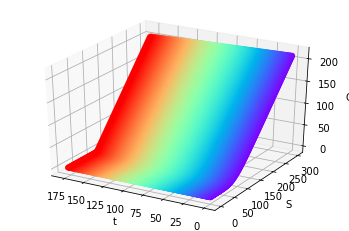

In [15]:
colors = cm.rainbow(np.linspace(0, 1, coord.shape[0]))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(coord[:, 1], coord[:, 0] , coord[:, 2], c=colors, marker='o')

ax.set_xlabel('t')
ax.set_ylabel('S')
ax.set_zlabel('C')

plt.gca().invert_xaxis()

plt.show()

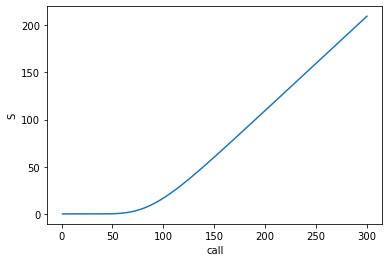

In [8]:
plt.figure()

plt.plot(s, C[:, 0])

plt.xlabel('call')
plt.ylabel('S')

plt.show()